In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.gaussian_process import GaussianProcessClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("/kaggle/input/conversion-predictors-of-cis-to-multiple-sclerosis/conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv")

In [3]:
df["group"].unique()

array([1, 2])

In [20]:
dd=df.fillna(0)
dd.isnull().sum()
dd

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,0.0,0.0,2
269,269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,0.0,0.0,2
270,270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,0.0,0.0,2
271,271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,0.0,0.0,2


In [17]:
df.isnull().sum()

Unnamed: 0                   0
Gender                       0
Age                          0
Schooling                    1
Breastfeeding                0
Varicella                    0
Initial_Symptom              1
Mono_or_Polysymptomatic      0
Oligoclonal_Bands            0
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
group                        0
dtype: int64

In [5]:
df.sample(3)

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
191,191,1,26,12.0,3,2,14.0,2,0,0,1,1,0,1,0,0,0,NaN,NaN,2
26,26,1,34,12.0,2,1,8.0,2,1,1,1,1,0,1,1,1,1,2.0,2.0,1
129,129,1,25,12.0,2,2,3.0,2,0,1,1,1,0,1,1,0,0,NaN,NaN,2


In [21]:
new_df=dd.drop(columns=["Unnamed: 0","Initial_EDSS","Final_EDSS"])
new_df

,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,2
269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,2
270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,2
271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,2


In [22]:
X=new_df.drop(columns=["group"])
Y=new_df["group"]

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [50]:
random_classif=RandomForestClassifier(n_estimators=500)
random_classif.fit(X_train,Y_train)
random_classif.score(X_test,Y_test)

0.7636363636363637

In [51]:
deci_classif=DecisionTreeClassifier()
deci_classif.fit(X_train,Y_train)
deci_classif.score(X_test,Y_test)

0.8181818181818182

In [52]:
grad_classif=GradientBoostingClassifier(n_estimators=500)
grad_classif.fit(X_train,Y_train)
grad_classif.score(X_test,Y_test)

0.7636363636363637

In [57]:
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)

log_reg.score(X_test,Y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7454545454545455

In [59]:
kn_classif=KNeighborsClassifier()
kn_classif.fit(X_train,Y_train)
kn_classif.score(X_test,Y_test)

0.6181818181818182

In [61]:
svm_classif=SVC()
svm_classif.fit(X_train,Y_train)
svm_classif.score(X_test,Y_test)

0.5818181818181818

In [62]:
linsvm_classif=LinearSVC()
linsvm_classif.fit(X_train,Y_train)
linsvm_classif.score(X_test,Y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8

In [96]:
y_pred_linsvm=linsvm_classif.predict(X_test)
y_pred_linsvm

array([1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1])

In [65]:
ext_classif=ExtraTreesClassifier()
ext_classif.fit(X_train,Y_train)
ext_classif.score(X_test,Y_test)

0.8

In [67]:
ada_classif=AdaBoostClassifier()
ada_classif.fit(X_train,Y_train)
ada_classif.score(X_test,Y_test)

0.8

In [71]:
bernolli_classif=BernoulliNB()
bernolli_classif.fit(X_train,Y_train)
bernolli_classif.score(X_test,Y_test)

0.8

In [95]:
y_pred_bernoulli=bernolli_classif.predict(X_test)
y_pred_bernoulli

array([1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1])

In [79]:
gau_classif=GaussianProcessClassifier()
gau_classif.fit(X_train,Y_train)
gau_classif.score(X_test,Y_test)

0.6727272727272727

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

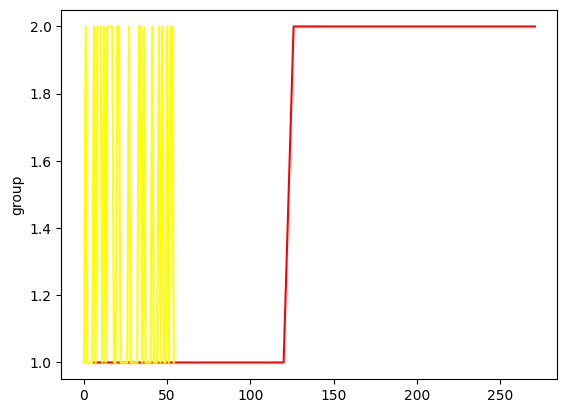

In [124]:
sns.lineplot(Y_test,color="red")
sns.lineplot(y_pred_linsvm,color="yellow")
plt.show()

<Axes: ylabel='group'>

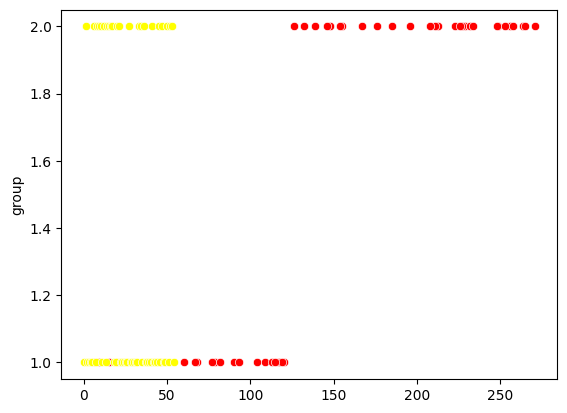

In [122]:
sns.scatterplot(Y_test,color="red")
sns.scatterplot(y_pred_linsvm,color="yellow")

In [106]:
array_y_test=np.array(Y_test)

<Axes: >

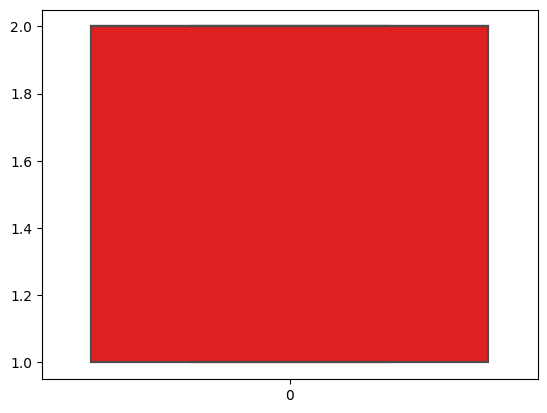

In [114]:
sns.boxplot(y_pred,color="yellow")
sns.boxplot(array_y_test,color="red")

<Axes: >

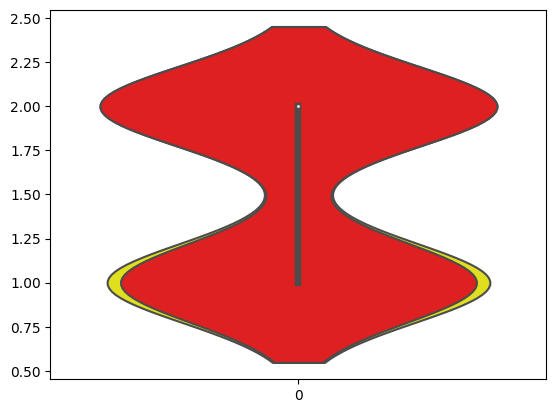

In [115]:
sns.violinplot(y_pred,color="yellow")
sns.violinplot(array_y_test,color="red")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

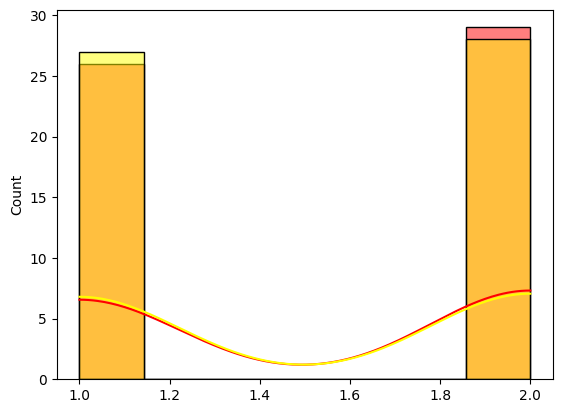

In [120]:
sns.histplot(array_y_test,kde=True,color="red")
sns.histplot(y_pred,kde=True,color="yellow")

/tmp/ipykernel_33/2367312054.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(array_y_test, color='red', label='Actual', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/2367312054.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, color='black', label='Predicted', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd

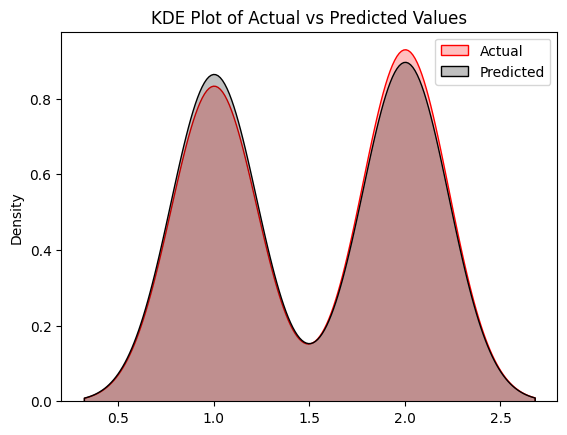

In [128]:
sns.kdeplot(array_y_test, color='red', label='Actual', shade=True)
sns.kdeplot(y_pred, color='black', label='Predicted', shade=True)
plt.legend()
plt.title('KDE Plot of Actual vs Predicted Values')
plt.show()